In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sb

In [2]:
products = pd.read_excel('/content/coffeeOrdersData.xlsx',sheet_name='products')
orders= pd.read_excel('/content/coffeeOrdersData.xlsx',sheet_name='orders')

In [3]:
d_f = pd.merge(products,orders)

In [4]:
d_f.columns

Index(['Product ID', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price',
       'Price per 100g', 'Profit', 'Order ID', 'Order Date', 'Month', 'Year',
       'Customer ID', 'Quantity'],
      dtype='object')

In [5]:
d_f['Revenue'] = d_f['Unit Price'] * d_f['Quantity']

In [6]:
d_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product ID      1000 non-null   object        
 1   Coffee Type     1000 non-null   object        
 2   Roast Type      1000 non-null   object        
 3   Size            1000 non-null   float64       
 4   Unit Price      1000 non-null   float64       
 5   Price per 100g  1000 non-null   float64       
 6   Profit          1000 non-null   float64       
 7   Order ID        1000 non-null   object        
 8   Order Date      1000 non-null   datetime64[ns]
 9   Month           1000 non-null   object        
 10  Year            1000 non-null   int64         
 11  Customer ID     1000 non-null   object        
 12  Quantity        1000 non-null   int64         
 13  Revenue         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
mem

In [7]:
d_f['Year'] = d_f['Year'].astype('object')

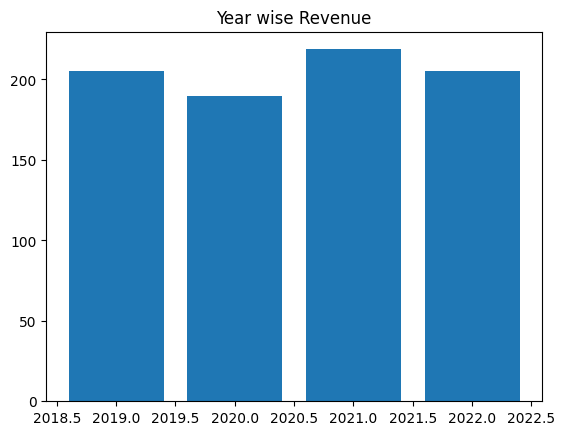

In [8]:
pp.title('Year wise Revenue')
f1 = pp.bar(d_f['Year'],d_f['Revenue'])
# f1.bar_label(f1.containers[0])
pp.show()

In [39]:
pd.pivot_table(d_f,index='Year',values='Revenue',aggfunc=['sum'])

,sum
,Revenue
Year,
2019,12187.165
2020,12117.545
2021,13766.110
2022,7063.435


In [21]:
print("\tTOTAL REVENUE : ", d_f['Revenue'].sum())

	TOTAL REVENUE :  45134.255


[Text(0, 0, '264'), Text(0, 0, '241'), Text(0, 0, '248'), Text(0, 0, '247')]

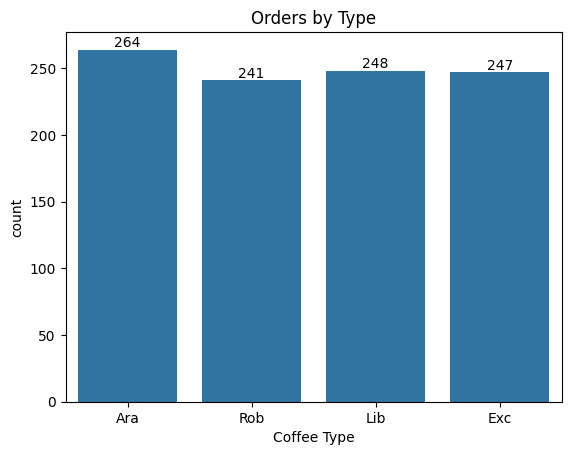

In [17]:
pp.title('Orders by Type')
f2 = sb.countplot(x='Coffee Type',data=d_f)
f2.bar_label(f2.containers[0])

In [11]:
d_f['Roast Type'].value_counts()

,count
Roast Type,
M,334
L,333
D,333


In [12]:
def roast_type(r_type):
  if r_type == 'M':
    return 'Medium'
  elif r_type == 'L':
    return 'Light'
  else:
    return 'Dark'

In [13]:
d_f['Roast Type'] = d_f['Roast Type'].apply(roast_type)

In [14]:
d_f['Roast Type'].value_counts()

,count
Roast Type,
Medium,334
Light,333
Dark,333


In [15]:
r_t = d_f.groupby('Roast Type').agg({'Roast Type':'count'})

([<matplotlib.patches.Wedge at 0x7f743fc76410>,
 [Text(0.5509972750609822, 0.9520514707070057, 'Dark'),
  Text(-1.099994571861817, 0.003455701743252279, 'Light'),
  Text(0.5480036415915858, -0.9537777565042922, 'Medium')],
 [Text(0.3005439682150811, 0.5193008022038212, '33.30'),
  Text(-0.5999970391973546, 0.0018849282235921519, '33.30'),
  Text(0.298911077231774, -0.5202424126387047, '33.40')])

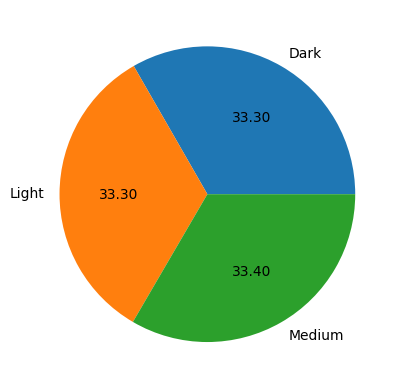

In [24]:
pp.pie(r_t['Roast Type'],labels=r_t.index,autopct="%1.2f")

Text(0.5, 1.0, 'Orders by Month')

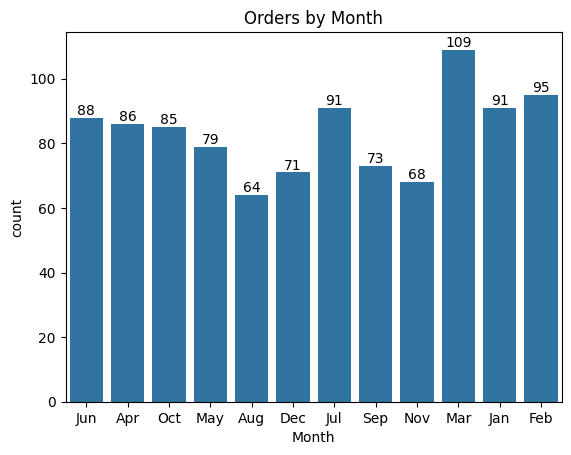

In [25]:
f3= sb.countplot(x='Month',data=d_f)
f3.bar_label(f3.containers[0])
pp.title('Orders by Month')

In [29]:
print("\tTOTAL PROFIT : " ,d_f['Profit'].sum())

	TOTAL PROFIT :  1301.37505


In [32]:
print("\tTOTAL PROFIT MADE : ", (1301.37505/45134.255)*100,"%")

	TOTAL PROFIT MADE :  2.8833422640963056 %


<Axes: xlabel='Month', ylabel='count'>

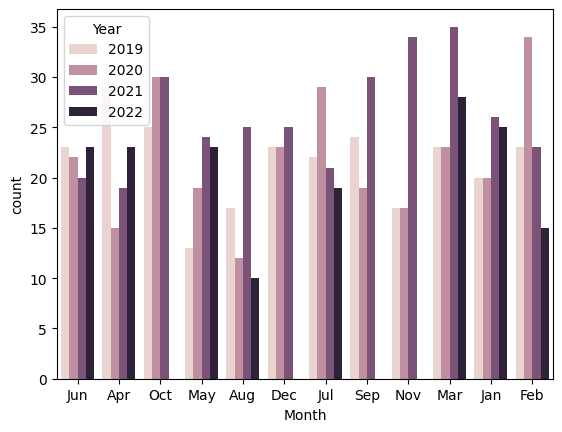

In [33]:
sb.countplot(x='Month',hue='Year',data=d_f)